#  Thyroid Detection 


* Problem Statement

    **  Thyroid disease is a common cause of medical diagnosis and prediction, with an onset
        that is difficult to forecast in medical research. The thyroid gland is one of our body's
        most vital organs. Thyroid hormone releases are responsible for metabolic regulation.
        Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroidthat releases thyroid 
        hormones in       regulating the rate of body's metabolism.
        The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid  or not.

age: int                  # age of the patient

sex: str                  # sex patient identifies

on_thyroxine: bool        # whether patient is on thyroxine

query_on_thyroxine: bool  # whether patient is on thyroxine

on_antithyroid_meds: bool # whether patient is on antithyroid meds

sick: bool                # whether patient is sick

pregnant: bool            # whether patient is pregnant

thyroid_surgery: bool     # whether patient has undergone thyroid surgery

I131_treatment: bool      # whether patient is undergoing I131 treatment

query_hypothyroid: bool   # whether patient believes they have hypothyroid

query_hyperthyroid: bool  # whether patient believes they have hyperthyroid

lithium: bool             # whether patient has been treated with lithium

goitre: bool              # whether patient has goitre

tumor: bool               # whether patient has tumor

hypopituitary: float      # whether patient has a hypopituitary gland

psych: bool               # whether patient has a psych

TSH_measured: bool        # whether TSH was measured in the blood

TSH: float                # TSH level in blood from lab work

T3_measured: bool         # whether T3 was measured in the blood

T3: float                 # T3 level in blood from lab work

TT4_measured: bool        # whether TT4 was measured in the blood

TT4: float                # TT4 level in blood from lab work

T4U_measured: bool        # whether T4U was measured in the blood

T4U: float                # T4U level in blood from lab work

FTI_measured: bool        # whether FTI was measured in the blood

FTI: float                # FTI level in blood from lab work

TBG_measured: bool        # whether TBG was measured in the blood

TBG: float                # TBG level in blood from lab work

referral_source: str      # referral source

target: str               # hyperthyroidism medical diagnosis

patient_id: str           # unique id of the patient


In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import plotly 
import plotly.graph_objects as go
import plotly.express as pe 
import plotly.offline as po
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [ ]:
# This code imports necessary modules for statistical analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.api import add_constant

In [4]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf  # Configuration file for plotly


def configure_plotly_browser_state():

    """
    Hides unnecessary plotly messages
    """
    import IPython
    display(IPython.core.display.HTML('''
        
        
        '''))

# READING DATASET 

In [5]:
df=pd.read_csv("hypothyroid.csv")

In [6]:
# This code returns the shape of the dataframe
df.shape

(3772, 30)

# TOP 5 RECORDS 

In [7]:
# Prints the first few rows of a DataFrame
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


# BOTTOM 5 RECORDS

In [8]:
# This command displays the last 5 rows of the data frame.
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,negative


# Sample of Dataset

In [9]:
# This code will randomly sample 5 rows from the dataframe df and display them
df.sample(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
1167,68,M,f,f,f,f,f,f,f,f,...,t,81,t,1.01,t,81,f,?,other,compensated_hypothyroid
1644,62,F,t,f,f,f,f,f,f,f,...,t,103,t,1.12,t,93,f,?,other,negative
63,74,M,f,f,f,f,f,f,f,f,...,t,77,t,0.91,t,84,f,?,SVI,negative
2899,40,?,f,f,f,f,f,f,f,f,...,t,78,t,0.9,t,87,f,?,other,compensated_hypothyroid
2121,72,F,t,f,f,f,f,f,f,f,...,t,164,f,?,f,?,f,?,other,negative


In [10]:
# This code counts the number of occurrences of each value in the 'Class' column of the df dataframe.
df['Class'].value_counts()

negative                   3481
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

# SHAPE OF DATA SET 

In [11]:
df.shape

(3772, 30)

# CHECKING DUPLICATES 

In [12]:
# This code counts the number of duplicate rows in a Pandas DataFrame
df.duplicated().sum()

61

# DROPPING DUPLICATES 

In [13]:
# Remove duplicate rows from the dataframe
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

# CHECKING NULLS

In [16]:
# This code uses the isna() function to check for null values in a dataframe and returns the sum of them.
df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [18]:
for column in df.columns:
    # Count the number of missing values represented by '?'
    count = df[column][df[column] == '?'].count()
    # If missing values are found, print the column name and count
    if count != 0:
        print(column, count)

age 1
sex 149
TSH 309
T3 709
TT4 171
T4U 327
FTI 325
TBG 3711


In [19]:
# Drop the 'TBG' column as it contains all missing values
df = df.drop('TBG', axis=1)

In [20]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [21]:
df.shape

(3711, 29)

# Numerical and Categorical Features

In [22]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 0 numerical features : []

We have 29 categorical features : ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class']


In [23]:
#finding dataytypes of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3711 non-null   object
 1   sex                        3711 non-null   object
 2   on_thyroxine               3711 non-null   object
 3   query_on_thyroxine         3711 non-null   object
 4   on_antithyroid_medication  3711 non-null   object
 5   sick                       3711 non-null   object
 6   pregnant                   3711 non-null   object
 7   thyroid_surgery            3711 non-null   object
 8   I131_treatment             3711 non-null   object
 9   query_hypothyroid          3711 non-null   object
 10  query_hyperthyroid         3711 non-null   object
 11  lithium                    3711 non-null   object
 12  goitre                     3711 non-null   object
 13  tumor                      3711 non-null   object
 14  hypopitu

In [24]:
df.describe().T

,count,unique,top,freq
age,3711,94,59,95
sex,3711,3,F,2424
on_thyroxine,3711,2,f,3247
query_on_thyroxine,3711,2,f,3661
on_antithyroid_medication,3711,2,f,3669
sick,3711,2,f,3564
pregnant,3711,2,f,3658
thyroid_surgery,3711,2,f,3658
I131_treatment,3711,2,f,3652
query_hypothyroid,3711,2,f,3477


# Preprocessing

In [25]:
#filling missing dat ain the form of ? by np.nan values 
df.isin(['?']).sum().sum()

1991

Overall 1991 values are missing in the form of ?

In [26]:
df.replace('?',np.nan,inplace=True)

In [27]:
df.shape

(3711, 29)

In [28]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

# Replacing age datatype into numerical

In [29]:
df['age'].dtype

dtype('O')

In [30]:
df['age']=pd.to_numeric(df['age'])

In [31]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
categorical

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'referral_source',
 'Class']

In [32]:
df_copy=df.copy()

In [33]:
df_copy['TSH']

0        1.3
1        4.1
2       0.98
3       0.16
4       0.72
        ... 
3767     NaN
3768       1
3769     5.1
3770     0.7
3771       1
Name: TSH, Length: 3711, dtype: object

In [34]:
#Convert the TSH into numeric 
df_copy['TSH']=df_copy['TSH'].astype('float')

In [35]:
df_copy['T3'].dtypes

dtype('O')

In [36]:
df_copy['T3']

0       2.5
1         2
2       NaN
3       1.9
4       1.2
       ... 
3767    NaN
3768    2.1
3769    1.8
3770      2
3771    2.2
Name: T3, Length: 3711, dtype: object

In [37]:
#Convert the T3 into numeric 
df_copy['T3']=df_copy['T3'].astype('float')

In [38]:
df_copy['TT4'].dtypes

dtype('O')

In [39]:
df_copy['TT4']

0       125
1       102
2       109
3       175
4        61
       ... 
3767    NaN
3768    124
3769    112
3770     82
3771     99
Name: TT4, Length: 3711, dtype: object

In [40]:
#Converting TT4 to numric format 
df_copy['TT4']=df_copy['TT4'].astype('float')

In [41]:
df_copy['T4U'].dtype

dtype('O')

In [42]:
df_copy['T4U']

0       1.14
1        NaN
2       0.91
3        NaN
4       0.87
        ... 
3767     NaN
3768    1.08
3769    1.07
3770    0.94
3771    1.07
Name: T4U, Length: 3711, dtype: object

In [43]:
df_copy['T4U']=df_copy['T4U'].astype('float')

In [44]:
df_copy['FTI'].dtypes

dtype('O')

In [45]:
df_copy['FTI']

0       109
1       NaN
2       120
3       NaN
4        70
       ... 
3767    NaN
3768    114
3769    105
3770     87
3771     92
Name: FTI, Length: 3711, dtype: object

In [46]:
df_copy['FTI'].unique()

array(['109', nan, '120', '70', '141', '78', '115', '132', '93', '121',
       '153', '151', '107', '119', '87', '81', '104', '130', '106', '116',
       '131', '190', '92', '102', '76', '98', '90', '61', '94', '129',
       '95', '91', '33', '113', '148', '140', '171', '155', '186', '122',
       '136', '110', '111', '97', '72', '100', '88', '67', '84', '103',
       '135', '203', '112', '117', '180', '142', '145', '156', '96',
       '134', '8.9', '60', '139', '41', '99', '89', '146', '124', '105',
       '85', '157', '143', '71', '221', '28', '108', '137', '83', '74',
       '170', '65', '101', '127', '274', '154', '114', '62', '86', '126',
       '125', '64', '172', '162', '79', '118', '73', '152', '163', '149',
       '14', '51', '165', '77', '32', '69', '80', '11', '54', '164',
       '123', '144', '10', '214', '200', '160', '53', '16', '138', '169',
       '56', '47', '133', '43', '68', '179', '224', '220', '82', '362',
       '182', '75', '66', '161', '57', '58', '312', '63', '

In [47]:
df_copy['FTI']=df_copy['FTI'].astype('float')

In [48]:
df_copy.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3710.000000,3402.000000,3002.000000,3540.000000,3384.000000,3386.000000
mean,51.860377,5.087820,2.013504,108.328475,0.994989,110.480715
std,20.123585,24.524998,0.827572,35.605132,0.195485,33.088316
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


Observation : It is shown max age of patient is noted 455 it cant be correct so it is wrong data

# Removing More Redundant Columns from Dataset 

In [49]:
# Since actual values are present in TSH, T3, TT4, T4U FTI so their measured values are not significant 
# for prediction of thyroid disease so we can remove them 
columns_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
df_copy.drop(columns=columns_to_drop, axis=1, inplace=True)

# Chekcking missing data 

In [50]:
df_copy.isna().sum().sort_values(ascending=False)

T3                           709
T4U                          327
FTI                          325
TSH                          309
TT4                          171
sex                          149
age                            1
goitre                         0
referral_source                0
psych                          0
hypopituitary                  0
tumor                          0
lithium                        0
query_hyperthyroid             0
query_hypothyroid              0
I131_treatment                 0
thyroid_surgery                0
pregnant                       0
sick                           0
on_antithyroid_medication      0
query_on_thyroxine             0
on_thyroxine                   0
Class                          0
dtype: int64

# EDA

In [51]:
df_copy['Class'].value_counts()

negative                   3420
compensated_hypothyroid     194
primary_hypothyroid          95
secondary_hypothyroid         2
Name: Class, dtype: int64

In [52]:
#Ckecking the distribution of target variable 
class_count=df_copy['Class'].value_counts().to_dict()

In [53]:
fig = go.Figure(data=[go.Bar(x=list(class_count.keys()), y=list(class_count.values()))])
fig.update_layout(title='Distribution of Target Variable',
                  xaxis_title='Class',
                  yaxis_title='Count')
fig.show()

# lets see the distribution of age

F:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='age', ylabel='Density'>

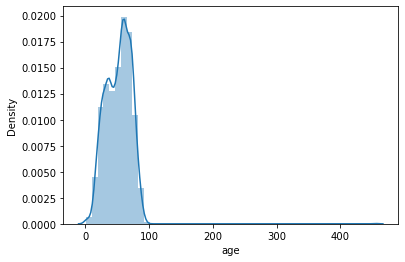

In [54]:
sns.distplot(df_copy['age'])

F:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

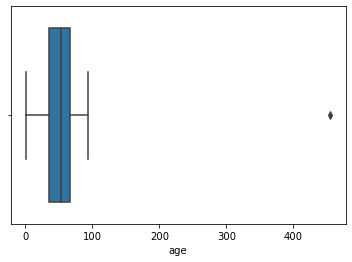

In [55]:
sns.boxplot(df_copy['age'])

# Lets see the distribution of Sex feature 

In [56]:
sex_counts=df_copy['sex'].value_counts().to_dict()
fig = go.Figure(data=[go.Bar(x=list(sex_counts.keys()), y=list(sex_counts.values()))])
fig.update_layout(title='Distribution Female and Males ',
                  xaxis_title='Gender',
                  yaxis_title='Count')
fig.show()

In [57]:
#Observation : from overall dataset female has highest distribution compared to male

In [58]:
pd.crosstab(df_copy['sex'],df['Class']).iplot(kind='bar')

Observation mostly feamle are free from thyroid disease 

# Analysis of on_thyroxine and query_on_thyroxine

In medical terms, levothyroxine is a medication used to treat an underactive thyroid gland (hypothyroidism). It is a synthetic form of the thyroid hormone thyroxine, also known as T4. "On_thyroxine" refers to whether a patient is currently taking levothyroxine medication, while "query_on_thyroxine" indicates whether there is uncertainty about whether the patient is taking levothyroxine or not.

In [59]:
df_copy['on_thyroxine'].value_counts()

f    3247
t     464
Name: on_thyroxine, dtype: int64

In [60]:
df_copy['on_thyroxine'].value_counts().iplot(kind='bar')

#Observation : 464 people  are taking levothyroxine  and 3247 are not taking levothyroxine but it not only case we have to check their imact with TSH level it it high with people taking levothyroxine  their metabolism has to be adjusted but if they are not taking levothyroxine  and if their TSH level is high people has to start their treatment with T4

In [61]:
pd.crosstab(df_copy['sex'],df_copy['on_thyroxine']).iplot(kind='bar')

Obseravtion : As compared to Male Female are more in number who are taking medication to treat hypothyroid disease

# Checking analysis of query_on_thyroxine

"Query_on_thyroxine" is a medical term used in cases of thyroid function testing. It refers to the presence or absence of thyroid hormone replacement therapy in a patient at the time of testing.

Thyroxine is a thyroid hormone that plays a crucial role in regulating metabolism, growth, and development. When the thyroid gland does not produce enough thyroxine, a condition known as hypothyroidism, hormone replacement therapy may be prescribed to supplement the body's thyroxine levels.

In cases where a patient is already taking thyroxine replacement therapy, their thyroid function testing results may be affected. Therefore, it is essential to note whether a patient is currently taking thyroxine or not when interpreting thyroid function tests.

In [62]:
df_copy['query_on_thyroxine'].value_counts().iplot(kind='bar')

Obeservation: 50 people are taking thyroxine replacement therapy, so while testing their thyroid test it must be noted that they are already taking thyroxine replacement therapy,

# Analysis of on_antithyroid_medication

 * Antithyroid medication is commonly used in the treatment of hyperthyroidism, which is a condition characterized by an overactive thyroid gland. In cases where the patient is on antithyroid medication, the medication can affect the results of thyroid function tests, which are used to diagnose and monitor thyroid function.
 
 * Antithyroid medication can affect these test results by reducing the levels of thyroid hormones in the blood.
 
 * The significance of antithyroid medication in thyroid detection cases is that it can complicate the interpretation of thyroid function test results
 
 * 

In [63]:
df_copy['on_antithyroid_medication'].value_counts().iplot(kind='bar')

Obseravtion : from overall patients 42 are taking antithyroid medication it seems they may be patients of hyperthyrodism

# Effect of Pregnanacy over Thyroid 

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

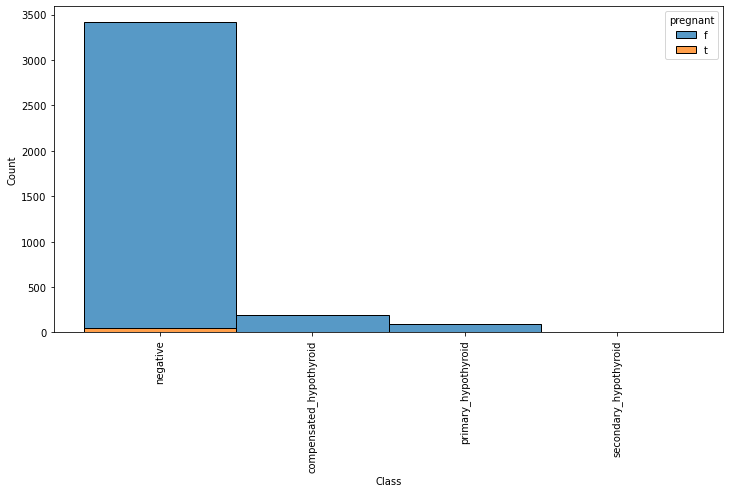

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Class", hue="pregnant", data=df_copy,stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

In [65]:
pd.crosstab(df_copy['pregnant'],df_copy['Class']).iplot(kind='bar')

In [66]:
pe.pie(names=df_copy['thyroid_surgery'].value_counts().index,values=df_copy['thyroid_surgery'].value_counts().values)

Observation :Overall 1.43 % of patients has taken thyoid sergery 

In [67]:
df_copy.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

# Analysis of I131_treatment in thyroid treatment 

   *  I-131 treatment, also known as radioactive iodine therapy, is a common treatment for thyroid disorders such as hyperthyroidism and thyroid cancer. The treatment involves the administration of a dose of radioactive iodine, which is taken up by the thyroid gland and destroys the overactive thyroid tissue or cancerous cells.
   * I-131 treatment also has a high success rate, with most patients experiencing complete remission of their condition after a single treatment.
   

In [68]:
pe.pie(names=df_copy['I131_treatment'].value_counts().index,values=df_copy['I131_treatment'].value_counts().values)

Observation : From overall patients 1.59% of have gone through the thyroid cancer treament which mainly affect for thyroid Diseasr

In [69]:
pd.crosstab(df_copy['sex'],df_copy['I131_treatment']).iplot(kind='bar')

Obseravtion : From male and female category Female has more count compared to Male of treatment of thyroid cancer

# Analysis of query_hypothyroid 

In [70]:
pe.pie(values=df_copy['query_hypothyroid'].value_counts(),names=df_copy['query_hyperthyroid'].value_counts().index)

Observation :6.31 % of patients are uncertain about their Hypothyroidism they have to check their TSH level to ensure thyroid disease

In [71]:
df_copy['goitre'].value_counts()

f    3677
t      34
Name: goitre, dtype: int64

In [72]:
df_copy['tumor'].value_counts()

f    3615
t      96
Name: tumor, dtype: int64

<AxesSubplot:xlabel='tumor', ylabel='goitre'>

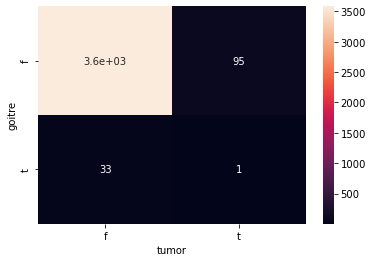

In [73]:
sns.heatmap(pd.crosstab(df_copy['goitre'],df_copy['tumor']),annot=True)

Obervation : 1 patien has tumor as well goiter it is strongly affetcted by thyroid disease . 95 patients dont have goiter but they tumor it may cause to be patient of thyroid

# Analysis of Tumor in Males and Females 

<AxesSubplot:xlabel='tumor', ylabel='sex'>

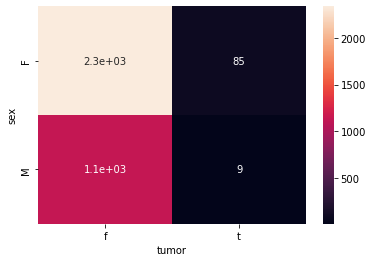

In [74]:
sns.heatmap(pd.crosstab(df_copy['sex'],df_copy['tumor']),annot=True)

Obsearvation : out of all patients 85 female hav tumor and 9 male have tumor 

# Analysis of pschyological factor in Detection of Thyoid 

 * Psychological factors can play a role in thyroid detection and management in several ways.
 * Firstly, the symptoms of thyroid disorders can sometimes overlap with symptoms of depression, anxiety, or other mental health conditions.
 * Secondly, thyroid disorders can also impact mental health. For example, an overactive thyroid (hyperthyroidism) can cause symptoms such as irritability, nervousness, and difficulty concentrating, while an underactive thyroid (hypothyroidism) can cause symptoms such as depression, fatigue, and memory problems.
 * Thirdly, stress and other psychological factors can impact thyroid function. Chronic stress, for example, can lead to an increase in cortisol levels, which can affect thyroid hormone production and lead to imbalances. 
 

In [75]:
pe.pie(names=df_copy['psych'].value_counts().index,values=df_copy['psych'].value_counts().values)

Observation :about 4.96% are suffering from psychological issues they may cause thyroid problem

<AxesSubplot:xlabel='psych', ylabel='sex'>

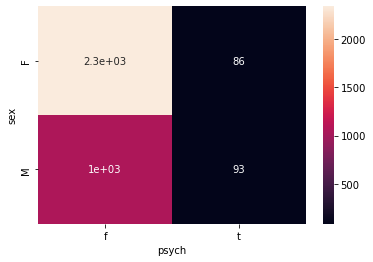

In [76]:
sns.heatmap(pd.crosstab(df_copy['sex'],df_copy['psych']),annot=True)

Observation : 86 Female and 93 Males are suffering from psch problem 

# Distribution of Numerical Features 

F:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

F:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

F:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

F:\New folder\anaconda\lib\site-packages\se

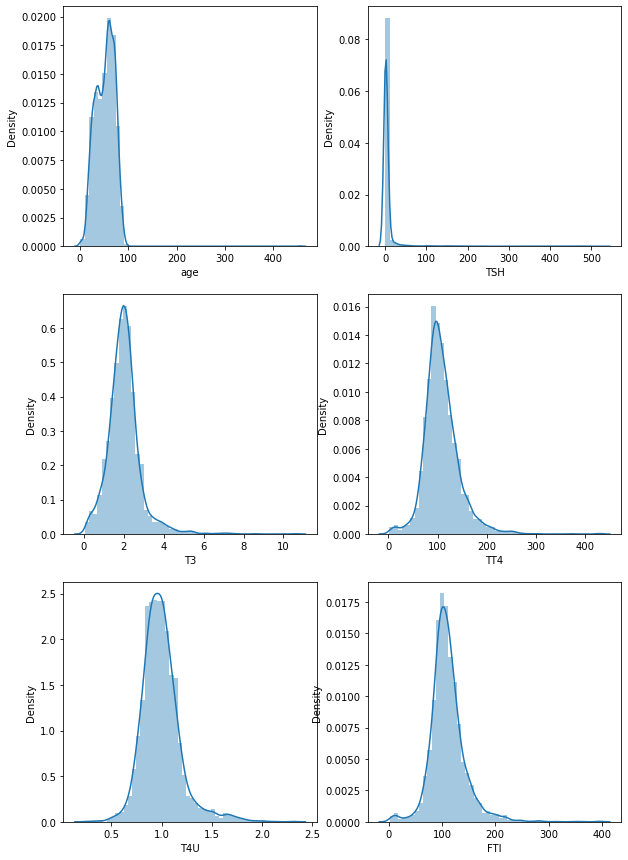

In [77]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df_copy[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()
     

In [78]:
from scipy.stats import skew

In [79]:
categorical_col = [i for i in df_copy.columns if df_copy[i].dtype == 'O']
categorical_col

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source',
 'Class']

In [80]:
Numerical_col = [i for i in df_copy.columns if df_copy[i].dtype != 'O']
Numerical_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [81]:
df_copy.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,4.10,2.0,102.0,NaN,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109.0,0.91,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175.0,NaN,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,negative


# Distribution of Numerical Features Before and After Transformation

Text(0.5, 1.0, 'After transformation')

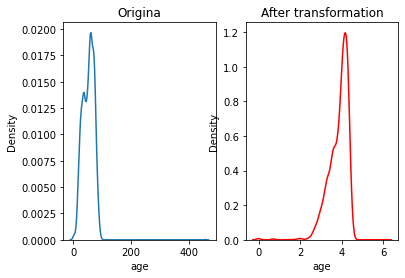

In [82]:
plt.subplot(1,2,1)
sns.kdeplot(df_copy['age'])
plt.title("Origina")
plt.subplot(1,2,2)
sns.kdeplot(np.log(df_copy['age']),color='red')
plt.title("After transformation")

In [83]:
Numerical_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

Text(0.5, 1.0, 'After transformation')

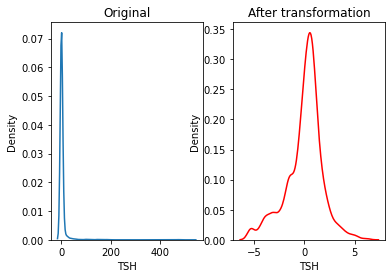

In [84]:
plt.subplot(1,2,1)
sns.kdeplot(df_copy['TSH'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.log(df_copy['TSH']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

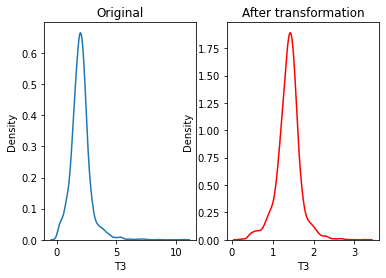

In [85]:
plt.subplot(1,2,1)
sns.kdeplot(df_copy['T3'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.sqrt(df_copy['T3']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

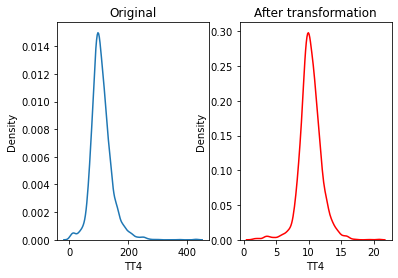

In [86]:
plt.subplot(1,2,1)
sns.kdeplot(df_copy['TT4'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.sqrt(df_copy['TT4']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

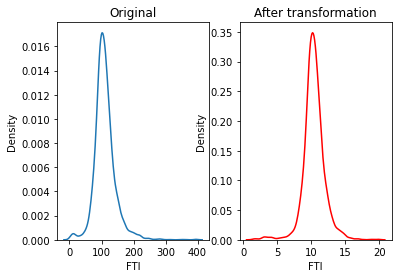

In [87]:
plt.subplot(1,2,1)
sns.kdeplot(df_copy['FTI'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.sqrt(df_copy['FTI']),color='red')
plt.title("After transformation")

Text(0.5, 1.0, 'After transformation')

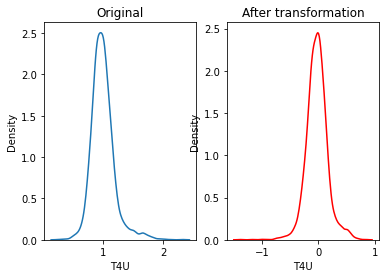

In [88]:
plt.subplot(1,2,1)
sns.kdeplot(df_copy['T4U'])
plt.title("Original")
plt.subplot(1,2,2)
sns.kdeplot(np.log(df_copy['T4U']),color='red')
plt.title("After transformation")

Observations:
After Applying Transforamtion and Calculating the Skewness, we found best result for numerical features:
* Age: LOG
* TSH: LOG
* T3: SQRT
* TT4: SQRT
* T4U: LOG
* FTI: SQRT

In [89]:
df_copy.shape

(3711, 23)

In [90]:
df_copy.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

# # Multivariate Analysis #

F:\New folder\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='TT4', ylabel='FTI'>

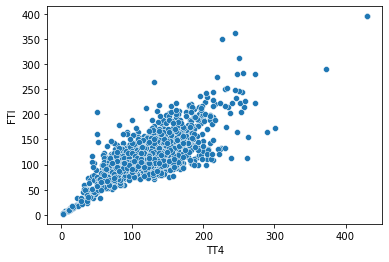

In [91]:
sns.scatterplot(df_copy['TT4'],df_copy['FTI'])

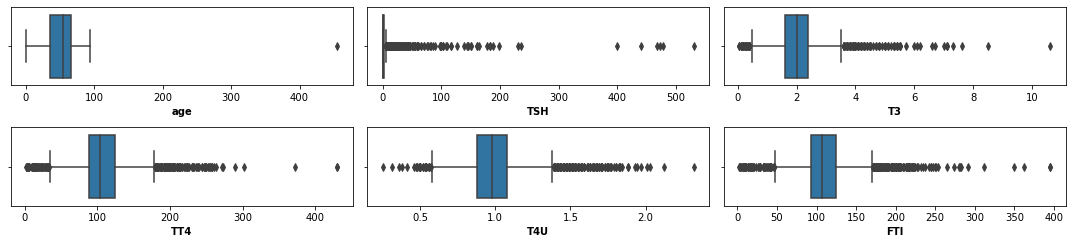

In [92]:
#lets see the outliers in dataset 
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=df_copy[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

<AxesSubplot:>

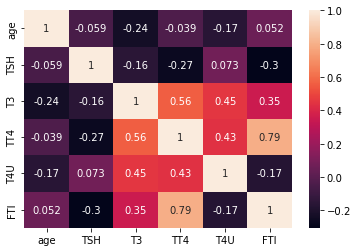

In [93]:
sns.heatmap(df_copy.corr(),annot=True)

In [94]:
df_copy.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral_source', 'Class'],
      dtype='object')

In [95]:
#Since it is of no use for analysing thyroid disease so we can drop it 

In [96]:
df_copy.drop('referral_source',axis=1,inplace=True)

In [97]:
df_copy.head(2)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.3,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.1,2.0,102.0,NaN,NaN,negative


In [98]:
#Finding corelation of categorical features with target column

In [99]:
#categorical_col.remove('Class')
#categorical_col.remove('referral_source')
categorical_col

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source',
 'Class']

In [100]:
import scipy.stats as  stats

In [101]:
for feature in ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery',
 'I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych']:
    contingency_table = pd.crosstab(df_copy[feature], df_copy['Class'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print('Chi-square test of independence for', feature)
    print('Chi-square statistic:', chi2)
    print('P-value:', p)
    print('Degrees of freedom:', dof)
    print('Expected values:', expected)
    print("-------------------------------------------------------------------------")

Chi-square test of independence for sex
Chi-square statistic: 11.410141468107955
P-value: 0.009702764404501156
Degrees of freedom: 3
Expected values: [[1.27256597e+02 2.23345536e+03 6.19270073e+01 1.36103313e+00]
 [5.97434026e+01 1.04854464e+03 2.90729927e+01 6.38966873e-01]]
-------------------------------------------------------------------------
Chi-square test of independence for on_thyroxine
Chi-square statistic: 30.81005520697033
P-value: 9.320384698267207e-07
Degrees of freedom: 3
Expected values: [[1.69743465e+02 2.99238480e+03 8.31218001e+01 1.74993263e+00]
 [2.42565346e+01 4.27615198e+02 1.18781999e+01 2.50067367e-01]]
-------------------------------------------------------------------------
Chi-square test of independence for query_on_thyroxine
Chi-square statistic: 1.4012510105268492
P-value: 0.7052415135771981
Degrees of freedom: 3
Expected values: [[1.91386149e+02 3.37392078e+03 9.37200216e+01 1.97305309e+00]
 [2.61385071e+00 4.60792239e+01 1.27997844e+00 2.69469146e-02]]

In [102]:
df_copy.to_csv("Thyroid_EDA.csv",index=False)